# **The following code may be used to generate an efficient frontier for a portfolio of stocks. **

In [ ]:
#Step 1 - import relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as source

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#Step 2 - Create a list of stocks and collect real time data of the adjusted close values for the stocks.
  #The stocks in the list can be changed using different tickers. 
  #The start date will be chosen to take 5-6 years' worth of data, this can be changed.
stocks = ['AAPL', 'AMZN']
adjclose_data = pd.DataFrame()
for s in stocks:
  adjclose_data[s] = source.DataReader(s, data_source = 'yahoo', start = '2015-1-1')['Adj Close']

In [ ]:
#CHECK - view the data
adjclose_data

,AAPL,AMZN
Date,,
2015-01-02,99.945885,308.519989
2015-01-05,97.130241,302.190002
2015-01-06,97.139420,295.290009
2015-01-07,98.501518,298.420013
2015-01-08,102.286186,300.459991
...,...,...
2020-07-17,385.309998,2961.969971
2020-07-20,393.429993,3196.840088
2020-07-21,388.000000,3138.290039


In [ ]:
#CHECK - Get an overview of the data to ensure that there are no missing values
  #The number of 'non-null' values should be equal for each stock.
adjclose_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399 entries, 2015-01-02 to 2020-07-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1399 non-null   float64
 1   AMZN    1399 non-null   float64
dtypes: float64(2)
memory usage: 32.8 KB


In [ ]:
#Step 3 - Calculate the daily return rate
return_daily = np.log(adjclose_data/adjclose_data.shift(1))
return_daily

,AAPL,AMZN
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.028576,-0.020731
2015-01-06,0.000094,-0.023098
2015-01-07,0.013925,0.010544
2015-01-08,0.037703,0.006813
...,...,...
2020-07-17,-0.002022,-0.012724
2020-07-20,0.020855,0.076308
2020-07-21,-0.013898,-0.018485


In [ ]:
#Calculate the average daily return rate and annualise this value
annual_return = return_daily.mean() * 250
annual_return

AAPL    0.234728
AMZN    0.405953
dtype: float64

In [ ]:
#Step 4 - calculate the daily covariance of the stocks and annualise this value
annual_cov = return_daily.cov()*250
annual_cov

,AAPL,AMZN
AAPL,0.080875,0.046479
AMZN,0.046479,0.092137


In [ ]:
#Step 5 - create a variable to display the number of stocks in the 'stocks' list
  #This will mean that more stock tickers can be included, without having to change the code that follows."""
number_stocks = len(stocks)
number_stocks

2

In [ ]:
# Step 6 - Randomly generate weights for the stocks within the portfolio
  #Ensure that the weights always sum to 1.
pfolio_weights = np.random.random(number_stocks)
pfolio_weights /= np.sum(pfolio_weights)
pfolio_weights

array([0.02895154, 0.97104846])

In [ ]:
#Step 7 - create empty lists to collect the portfolio returns and volatility data
pfolio_returns = []
pfolio_volatilities = []

In [ ]:
#Step 8 - create a variable to dictate the number of portfolios that will be simulated
  #This value can be changed.
number_pfolios = 10000

In [ ]:
#Step 9 - use iterations to efficiently obtain the portfolio returns and weights and transform the lists into Numpy arrays.
for p in range(number_pfolios):
  pfolio_weights = np.random.random(number_stocks)
  pfolio_weights /= np.sum(pfolio_weights)
  pfolio_returns.append(np.sum(pfolio_weights*return_daily.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(pfolio_weights.T,np.dot(annual_cov,pfolio_weights))))
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [ ]:
#CHECK - check the number of entries in the portfolio return array.
len(pfolio_returns)

10000

In [ ]:
#CHECK - check the number of entries in the portfolio volatility array.
len(pfolio_volatilities)

10000

In [ ]:
# Step 10 - create a dictionary containing the portfolio returns and volatilities entries
  #Structure this dictionary as a data frame to view the values together.
portfolio_data = pd.DataFrame({'Return': pfolio_returns, 'Volatility' : pfolio_volatilities})
portfolio_data

,Return,Volatility
0,0.341260,0.262800
1,0.355635,0.268729
2,0.329231,0.259409
3,0.317428,0.257535
4,0.306594,0.257108
...,...,...
9995,0.307791,0.257094
9996,0.236270,0.283305
9997,0.399125,0.297696
9998,0.294215,0.258143


Text(0, 0.5, 'Expected Return')

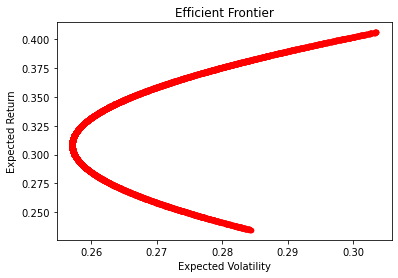

In [ ]:
#Step 11 - Visualise the portfolio entries to obtain the efficient frontier
portfolio_data.plot(x = 'Volatility', y = 'Return', kind = 'scatter', color = 'red' )
plt.title('Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

The result displays the expected volatility and expected return rate from different combinations of the two stocks. This can be used to help investors make better decisions in choosing how much capital to allocate to each each stock when constructing a portfolio. 